Importing packages and the dataset

In [1]:
# Importing necessary NN features
import tensorflow as tf
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical, np_utils
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model

print(os.getcwd())

# Importing the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Checking values
print(x_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


C:\Users\anais
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253

Pre-processing

In [2]:
# Normalising x values to a range 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Checking values
print(x_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Defining the NN model 1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.6706 - accuracy: 0.8325 - val_loss: 0.3634 - val_accuracy: 0.9020
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3436 - accuracy: 0.9044 - val_loss: 0.2949 - val_accuracy: 0.9185
Epoch 3/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.2940 - accuracy: 0.9170 - val_loss: 0.2649 - val_accuracy: 0.9241
Epoch 4/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.2636 - accuracy: 0.9265 - val_loss: 0.2420 - val_accuracy: 0.9330
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2409 - accuracy: 0.9328 - val_loss: 0.2258 - val_accuracy: 0.9379
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2221 - accuracy: 0.9379 - val_loss: 0.2111 - va

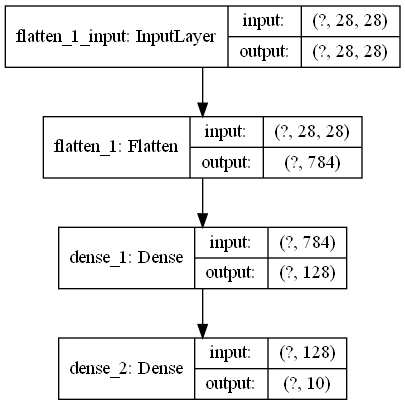

In [3]:
# Defining a NN model 1
NNmodel1 = Sequential()
NNmodel1.add(Flatten(input_shape=(28, 28)))
NNmodel1.add(Dense(128, activation='relu'))
NNmodel1.add(Dense(10, activation='softmax'))

# Compiling the modelè
NNmodel1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the model on training data
NNmodel1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Visualising the model architecture
NNmodel1.summary()

plot_model(NNmodel1, to_file='NNmodel1.png', show_shapes=True, show_layer_names=True)

Evaluating NN model 1

In [4]:
# evaluate the model
scores = NNmodel1.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (NNmodel1.metrics_names[1], scores[1]*100))


10000/10000 [==============================] - 0s 39us/step
accuracy: 95.36%


Building, training and testing NN model 1.1, 1.2 and 1.3

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.5757 - accuracy: 0.8547 - val_loss: 0.3037 - val_accuracy: 0.9150
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.2797 - accuracy: 0.9198 - val_loss: 0.2410 - val_accuracy: 0.9315
Epoch 3/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.2263 - accuracy: 0.9347 - val_loss: 0.2008 - val_accuracy: 0.9423
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1913 - accuracy: 0.9455 - val_loss: 0.1726 - val_accuracy: 0.9498
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1658 - accuracy: 0.9521 - val_loss: 0.1534 - val_accuracy: 0.9557
Epoch 6/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1463 - accuracy: 0.9580 - val_loss: 0.1384 - val_accuracy: 0.9581
Epoch 7/10
60000/60000 [==============================] -

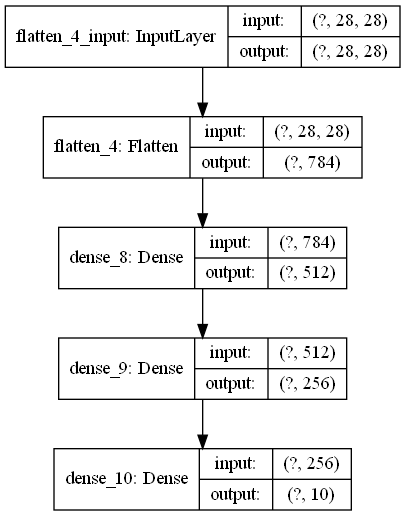

In [5]:
# NN model 1.1
NNmodel1_1 = Sequential()
NNmodel1_1.add(Flatten(input_shape=(28, 28)))
NNmodel1_1.add(Dense(256, activation='relu'))
NNmodel1_1.add(Dense(128, activation='relu'))
NNmodel1_1.add(Dense(10, activation='softmax'))
NNmodel1_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
NNmodel1_1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
scores1_1 = NNmodel1_1.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (NNmodel1_1.metrics_names[1], scores1_1[1]*100))

# NN model 1.2
NNmodel1_2 = Sequential()
NNmodel1_2.add(Flatten(input_shape=(28, 28)))
NNmodel1_2.add(Dense(64, activation='relu'))
NNmodel1_2.add(Dense(10, activation='softmax'))
NNmodel1_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
NNmodel1_2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
scores1_2 = NNmodel1_2.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (NNmodel1_2.metrics_names[1], scores1_2[1]*100))

# NN model 1.3
NNmodel1_3 = Sequential()
NNmodel1_3.add(Flatten(input_shape=(28, 28)))
NNmodel1_3.add(Dense(512, activation='relu'))
NNmodel1_3.add(Dense(256, activation='relu'))
NNmodel1_3.add(Dense(10, activation='softmax'))
NNmodel1_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
NNmodel1_3.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
scores1_3 = NNmodel1_3.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (NNmodel1_3.metrics_names[1], scores1_3[1]*100))

# Visualising the model 1.3 architecture
NNmodel1_3.summary()
plot_model(NNmodel1_3, to_file='NNmodel2.png', show_shapes=True, show_layer_names=True)

Building and training CNN model 1

In [6]:
# Reshaping the x values to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Build the model
CNNmodel1 = Sequential()
CNNmodel1.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
CNNmodel1.add(MaxPooling2D())
CNNmodel1.add(Flatten())
CNNmodel1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1.add(Dropout(0.2))
CNNmodel1.add(Dense(10, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) 

# Compiling the model
CNNmodel1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Visualising the model architecture
CNNmodel1.summary()
plot_model(CNNmodel1, to_file='CNNmodel1.png', show_shapes=True, show_layer_names=True)

# Training the model
tf.set_random_seed(1)
np.random.seed(1)
epochs = 5
CNNmodel1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)              

Evaluating CNN model 1

In [7]:
# Final evaluation of the model
CNNmodel1scores = CNNmodel1.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (CNNmodel1scores[1]*100))

10000/10000 [==============================] - 3s 268us/step
Accuracy: 96.94%


Building, training and testing CNN models 1.1, 1.2 and 1.3

In [8]:
# Reshaping the x values to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) 
tf.set_random_seed(1)
np.random.seed(1)
epochs = 5

# CNN model 1.1
CNNmodel1_1 = Sequential()
CNNmodel1_1.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_1.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_1.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_1.add(Flatten())
CNNmodel1_1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_1.add(Dropout(0.2))
CNNmodel1_1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_1.add(Dense(10, activation='softmax'))
CNNmodel1_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
CNNmodel1_1.summary()
plot_model(CNNmodel1_1, to_file='CNNmodel1_2.png', show_shapes=True, show_layer_names=True)
CNNmodel1_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)
CNNmodel1_1scores = CNNmodel1_1.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (CNNmodel1_1scores[1]*100))
    
# CNN model 1.2
CNNmodel1_2 = Sequential()
CNNmodel1_2.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
CNNmodel1_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNNmodel1_2.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
CNNmodel1_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
CNNmodel1_2.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
CNNmodel1_2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
CNNmodel1_2.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_2.add(Flatten())
CNNmodel1_2.add(Dense(512, activation='relu'))
CNNmodel1_2.add(Dropout(0.2))
CNNmodel1_2.add(Dense(10, activation='softmax'))
CNNmodel1_2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
CNNmodel1_2.summary()
plot_model(CNNmodel1_2, to_file='CNNmodel1_2.png', show_shapes=True, show_layer_names=True)
CNNmodel1_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)
CNNmodel1_2scores = CNNmodel1_2.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (CNNmodel1_2scores[1]*100))


# CNN model 1.3
CNNmodel1_3 = Sequential()
CNNmodel1_3.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # Increased to 64 filters
CNNmodel1_3.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # Added a third Conv layer with 128 filters
CNNmodel1_3.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel1_3.add(Flatten())
CNNmodel1_3.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel1_3.add(Dropout(0.2))
CNNmodel1_3.add(Dense(10, activation='softmax'))
CNNmodel1_3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
CNNmodel1_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=60, verbose=1)
CNNmodel1_3scores = CNNmodel1_3.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (CNNmodel1_3scores[1] * 100))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              12846080  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

Optimising hyperparameters

In [9]:
# Reshaping the x values to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Define optimizer
lrate = 0.002 ## CHANGED BETWEEN 0.01, 0.001, 0.002, 0.005
epochs = 5
decay = lrate/epochs
adam = Adam(lr=lrate) ## CHANGED BETWEEN SGD (momentum=0.7) and ADAM
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) ## CHANGED BETWEEN SGD (momentum=0.7) and ADAM
tf.set_random_seed(1)
np.random.seed(1)


CNNmodel2 = Sequential()
CNNmodel2.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel2.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
CNNmodel2.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel2.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
CNNmodel2.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel2.add(Flatten())
CNNmodel2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
CNNmodel2.add(Dropout(0.2))
CNNmodel2.add(Dense(10, activation='softmax'))
CNNmodel2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
CNNmodel2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=60, verbose=1)# Changed num of epochs and batch size
CNNmodel2scores = CNNmodel2.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (CNNmodel2scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1023 - accuracy: 0.9680 - val_loss: 0.0307 - val_accuracy: 0.9909
Epoch 2/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0367 - val_accuracy: 0.9865
Epoch 3/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 4/5
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0312 - val_accuracy: 0.9886
Epoch 5/5
10000/10000 [==============================] - 7s 652us/step
Accuracy: 99.34%
